In [1]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from prophet import Prophet
from datetime import datetime
import plotly.graph_objects as go

Define start date and end date variables (must match options)

In [2]:
start_date = '2024-03-20'
end_date = '2024-04-20'

Import data

In [3]:
df = pd.read_csv('/Users/tristan/Library/CloudStorage/OneDrive-StellenboschUniversity/Academics/Final_year/Semester 2/Skripsie/Data/RESAMPLED/{}-{}.csv'.format(start_date, end_date))
df.drop(df.columns[0], axis=1, inplace=True)
print(df)

          NS_SQUID  F_SQUID  NS_Fluxgate  EW_Fluxgate  Z_Fluxgate
0         -17.2443   0.3012   10934.2807     -42.4087 -22656.4241
1         -17.2414   0.3024   10934.2699     -42.4171 -22656.4286
2         -17.2352   0.2902   10934.2699     -42.4171 -22656.4286
3         -17.2389   0.2985   10934.2653     -42.4182 -22656.4315
4         -17.2338   0.2598   10934.2594     -42.3772 -22656.4375
...            ...      ...          ...          ...         ...
13567967  113.3631  12.2312   10927.0608     -86.1647 -22664.6485
13567968  113.3626  12.2281   10927.0573     -86.1557 -22664.6473
13567969  113.3582  12.2250   10927.0434     -86.0894 -22664.6146
13567970  113.3568  12.2217   10927.0434     -86.0894 -22664.6146
13567971  113.3554  12.2195   10927.0264     -86.0232 -22664.6616

[13567972 rows x 5 columns]


### Isolation Forest

Split the dataset

In [4]:
# X_train, X_test = train_test_split(df.drop(index = 1), test_size=0.3, random_state=42)
# print(f'Train dataset:\n',X_train)
# print(f'Test dataset: :\n', X_test)

Isolation Forest

In [5]:
# initialize and fit the model
model = IsolationForest(contamination='auto')
X = df['H Component']
model.fit(X)

IsolationForest()

Now predict

<Axes: ylabel='proportion'>

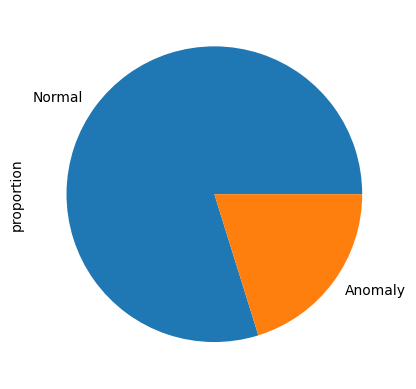

In [6]:
X['anomaly'] = model.predict(X)
print(X["anomaly"== -1] # anomalies

(df
 .anomaly
 .value_counts(normalize=True)
 .rename(index={1: 'Normal', -1: 'Anomaly'})
 .plot.pie()
)

# Make the problem supervised

Now add column to indicate solar storm presence

In [1]:
# These are the most active days in the last year

['2024-05-11',
 '2024-05-10',
 '2024-08-12',
 '2024-05-12',
 '2024-03-24',
 '2024-08-13',
 '2024-04-19',
 '2024-08-04',
 '2024-03-03',
 '2024-06-28',
 '2024-05-13',
 '2024-05-17',
 '2024-05-02',
 '2024-05-18',
 '2024-05-16',
 '2024-03-25',
 '2024-03-04']


['2024-05-11',
 '2024-05-10',
 '2024-08-12',
 '2024-05-12',
 '2024-03-24',
 '2024-08-13',
 '2024-04-19',
 '2024-08-04',
 '2024-03-03',
 '2024-06-28',
 '2024-05-13',
 '2024-05-17',
 '2024-05-02',
 '2024-05-18',
 '2024-05-16',
 '2024-03-25',
 '2024-03-04']

Now we visualize the analoumous data

In [7]:
y_pred = clf.predict(X)
X[y_pred == -1] # anomalies

Define Mahalanobis model

In [ ]:
# Define the Elliptic Envelope
el = covariance.EllipticEnvelope(store_precision=True, assume_centered=False, support_fraction=None, 
                                    contamination=0.0075, random_state=0)
# Fit the data - this is where FastMCD is used by sklearn
el.fit(df)
# Create column that shows anomaly status
df['Anomaly or Not'] = el.predict(df)
# Create scatterplot and color the anomalies differently
plt.figure(figsize = (9, 4))
ax = plt.scatter(df['Var 1'], d['Var 2'], c = df['Anomaly or Not'], cmap = 'coolwarm')
plt.xlabel('Var 1')
plt.ylabel('Var 2')
plt.colorbar(label = '-1: Anomaly; +1: Not Anomaly')
plt.grid()

Predict the anomalies in the data

Visulization

In [ ]:
def create_scatter_plots(X1, y1, title1, X2, y2, title2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Scatter plot for the first set of data
    axes[0].scatter(X1[y1==1, 0], X1[y1==1, 1], color='green', label='Normal')
    axes[0].scatter(X1[y1==-1, 0], X1[y1==-1, 1], color='red', label='Anomaly')
    axes[0].set_title(title1)
    axes[0].legend()

    # Scatter plot for the second set of data
    axes[1].scatter(X2[y2==1, 0], X2[y2==1, 1], color='green', label='Normal')
    axes[1].scatter(X2[y2==-1, 0], X2[y2==-1, 1], color='red', label='Anomaly')
    axes[1].set_title(title2)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# scatter plots
create_scatter_plots(X_train, y_pred_train, 'Training Data', X_test, y_pred_test, 'Test Data')